# Problem 1:

Construct two sequences with equal length of 100 nt by choosing A, U, G, C randomly; then produce a dot  plot. Find the most similar region of the aligned sequences.

In [1]:
import numpy as np
import random as rn
import matplotlib.pyplot as plt

In [2]:
nt = ["A","U","G","C"]

In [3]:
def create_rna(n):
    rna = []
    for i in range(n):
        rna.append(rn.choice(nt))
    rna_seq = "".join(rna)
    return(rna_seq,rna)

In [4]:
seq1,seq_list1 = create_rna(75)

In [5]:
seq1

'GAUCCGGGCUACCGACAAGUCAUACCUAACACCAAGGGUACGAGCCCGAUAAGACGUAUUAACCAAUGUACGGAC'

In [6]:
seq_list1

['G',
 'A',
 'U',
 'C',
 'C',
 'G',
 'G',
 'G',
 'C',
 'U',
 'A',
 'C',
 'C',
 'G',
 'A',
 'C',
 'A',
 'A',
 'G',
 'U',
 'C',
 'A',
 'U',
 'A',
 'C',
 'C',
 'U',
 'A',
 'A',
 'C',
 'A',
 'C',
 'C',
 'A',
 'A',
 'G',
 'G',
 'G',
 'U',
 'A',
 'C',
 'G',
 'A',
 'G',
 'C',
 'C',
 'C',
 'G',
 'A',
 'U',
 'A',
 'A',
 'G',
 'A',
 'C',
 'G',
 'U',
 'A',
 'U',
 'U',
 'A',
 'A',
 'C',
 'C',
 'A',
 'A',
 'U',
 'G',
 'U',
 'A',
 'C',
 'G',
 'G',
 'A',
 'C']

In [7]:
seq2,seq_list2 = create_rna(75)

In [8]:
seq2

'UUUCCUUUAUGUUAGACUGUUUAAUUGCGCCACCCUACGCCAUUUCGAUCUAUGGUCACUAAGCUCUAAUCGAUA'

In [9]:
seq_list2

['U',
 'U',
 'U',
 'C',
 'C',
 'U',
 'U',
 'U',
 'A',
 'U',
 'G',
 'U',
 'U',
 'A',
 'G',
 'A',
 'C',
 'U',
 'G',
 'U',
 'U',
 'U',
 'A',
 'A',
 'U',
 'U',
 'G',
 'C',
 'G',
 'C',
 'C',
 'A',
 'C',
 'C',
 'C',
 'U',
 'A',
 'C',
 'G',
 'C',
 'C',
 'A',
 'U',
 'U',
 'U',
 'C',
 'G',
 'A',
 'U',
 'C',
 'U',
 'A',
 'U',
 'G',
 'G',
 'U',
 'C',
 'A',
 'C',
 'U',
 'A',
 'A',
 'G',
 'C',
 'U',
 'C',
 'U',
 'A',
 'A',
 'U',
 'C',
 'G',
 'A',
 'U',
 'A']

In [10]:
import numpy as np
def dotPlot(seq_list1,seq_list2):
    x=[]
    y=[]
    for i in range(len(seq_list1)):
        for j in range(len(seq_list2)):
            if(seq_list1[i]==seq_list2[j]):
                x.append(i)
                y.append(j)
    return(plt.scatter(x,y))

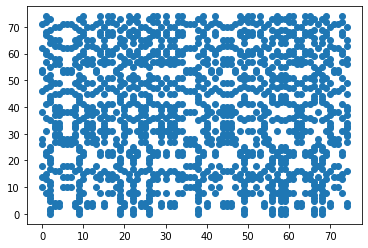

In [11]:

dotPlot(seq_list1,seq_list2)

In [12]:
# Find Most Simmilar Region
seq_list1 = list(seq1)
seq_list2 = list(seq2)
x = []
y = []

for i in range(len(seq_list1)):
    if (seq_list1[i]==seq_list2[i]):
        x.append(i)

In [13]:
def group_sequence(lst): 
    res = [[lst[0]]] 
    for i in range(1, len(lst)): 
        if lst[i-1]+1 == lst[i]: 
            res[-1].append(lst[i]) 
        else: 
            res.append([lst[i]]) 
    return res 

In [14]:
temp=[len(i) for i in group_sequence(x)]
max_pos = temp.index(max(temp))  

seq3=[seq1[i] for i in group_sequence(x)[max_pos]]
region="".join(seq3)
print(region)

UCC


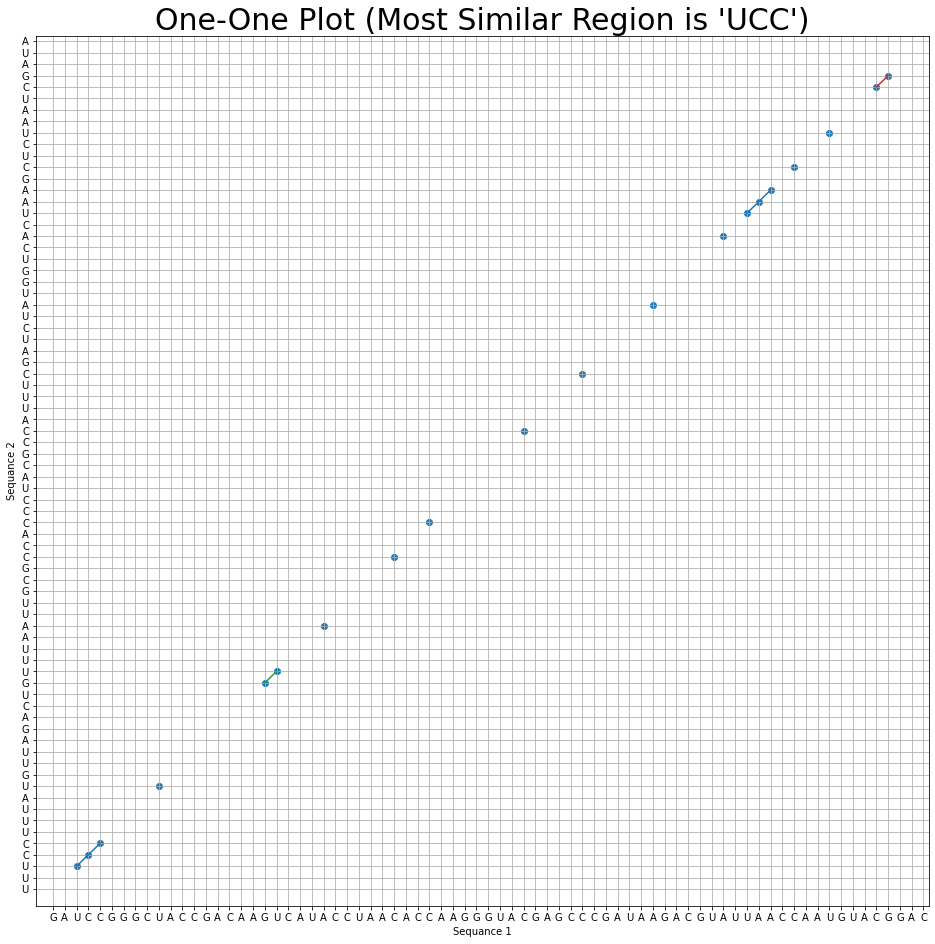

In [15]:
#plot 1-1 plot with similar regions

plt.figure(figsize=(16,16))
plt.scatter(x,x)
for i in group_sequence(x):    
    plt.plot(i,i)
plt.title("One-One Plot (Most Similar Region is '{}')".format(region),fontsize= 30)
plt.xlabel("Sequance 1")
plt.ylabel("Sequance 2")
xt=plt.xticks(np.arange(len(list(seq1))),list(seq1))
yt=plt.yticks(np.arange(len(list(seq2))),list(seq2))
plt.grid()
plt.show()

# Problem 2:

Using sliding window methods (window size is 10nt and cut-off value is 8), produce a dot plot of these two sequences. Then increase the window size to 20 nt and then show the effects on the similarity regions.

In [16]:
def Sliding_window(seq1,seq2,thresold,window):
    l1=list(seq1)
    l2=list(seq2)

    seq11 = ["".join(l1[i:i+window]) for i in range(0, len(l1)) if(len(l1[i:i+window])==window)] 
    seq22 = ["".join(l2[i:i+window]) for i in range(0, len(l2)) if(len(l2[i:i+window])==window)] 
    x=[]
    y=[]
    for i in range(len(seq11)):    
        for j in range(len(seq22)):
            count=0    
            for k in range(window):
                if(seq11[i][k]==seq22[j][k]):
                    count+=1
            if(count>=thresold):
                x.append(seq11.index(seq11[i]))
                y.append(seq22.index(seq22[j]))
                
    plt.figure(figsize=(20,20))
    plt.scatter(x,y)

    xt=plt.xticks(np.arange(len(list(seq11))),list(seq11),rotation=90)
    yt=plt.yticks(np.arange(len(list(seq22))),list(seq22))

    plt.xlabel("Sequance 1 ({})".format(seq2),fontsize=20)
    plt.ylabel("Sequance 2 ({})".format(seq1),fontsize=20)
    plt.title("Window size = {}, thresold={}".format(window,thresold),fontsize=30)
    plt.grid()
    plt.show()
   
    
    

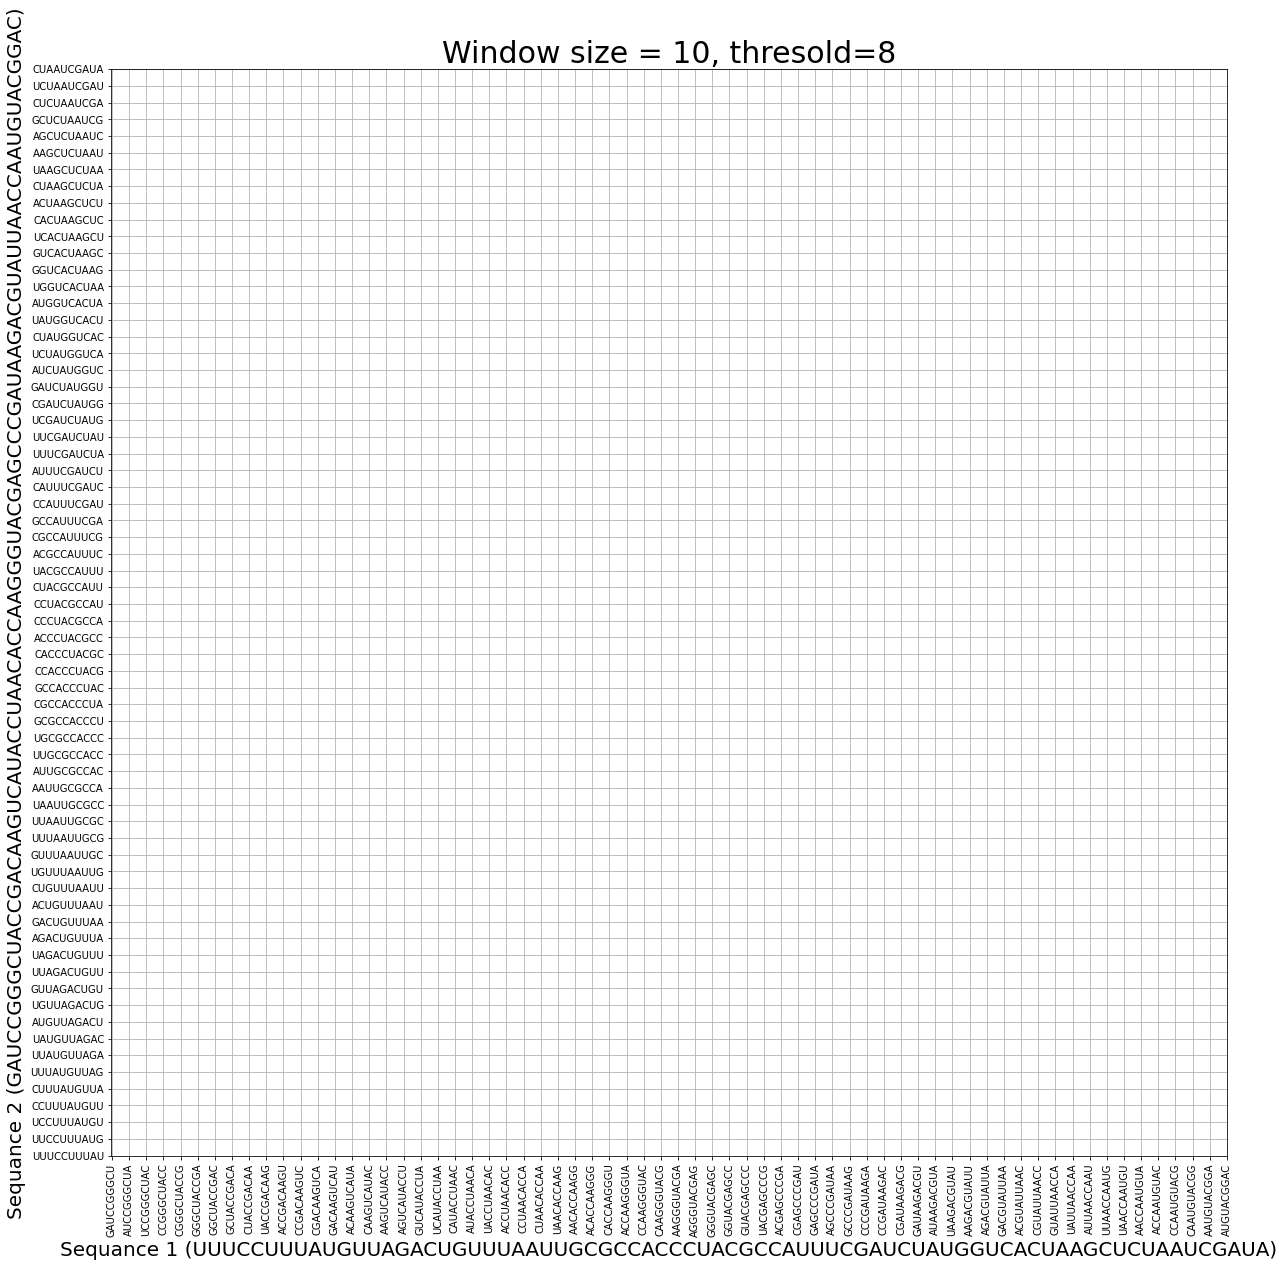

In [17]:
Sliding_window(seq1,seq2,thresold=8,window=10)

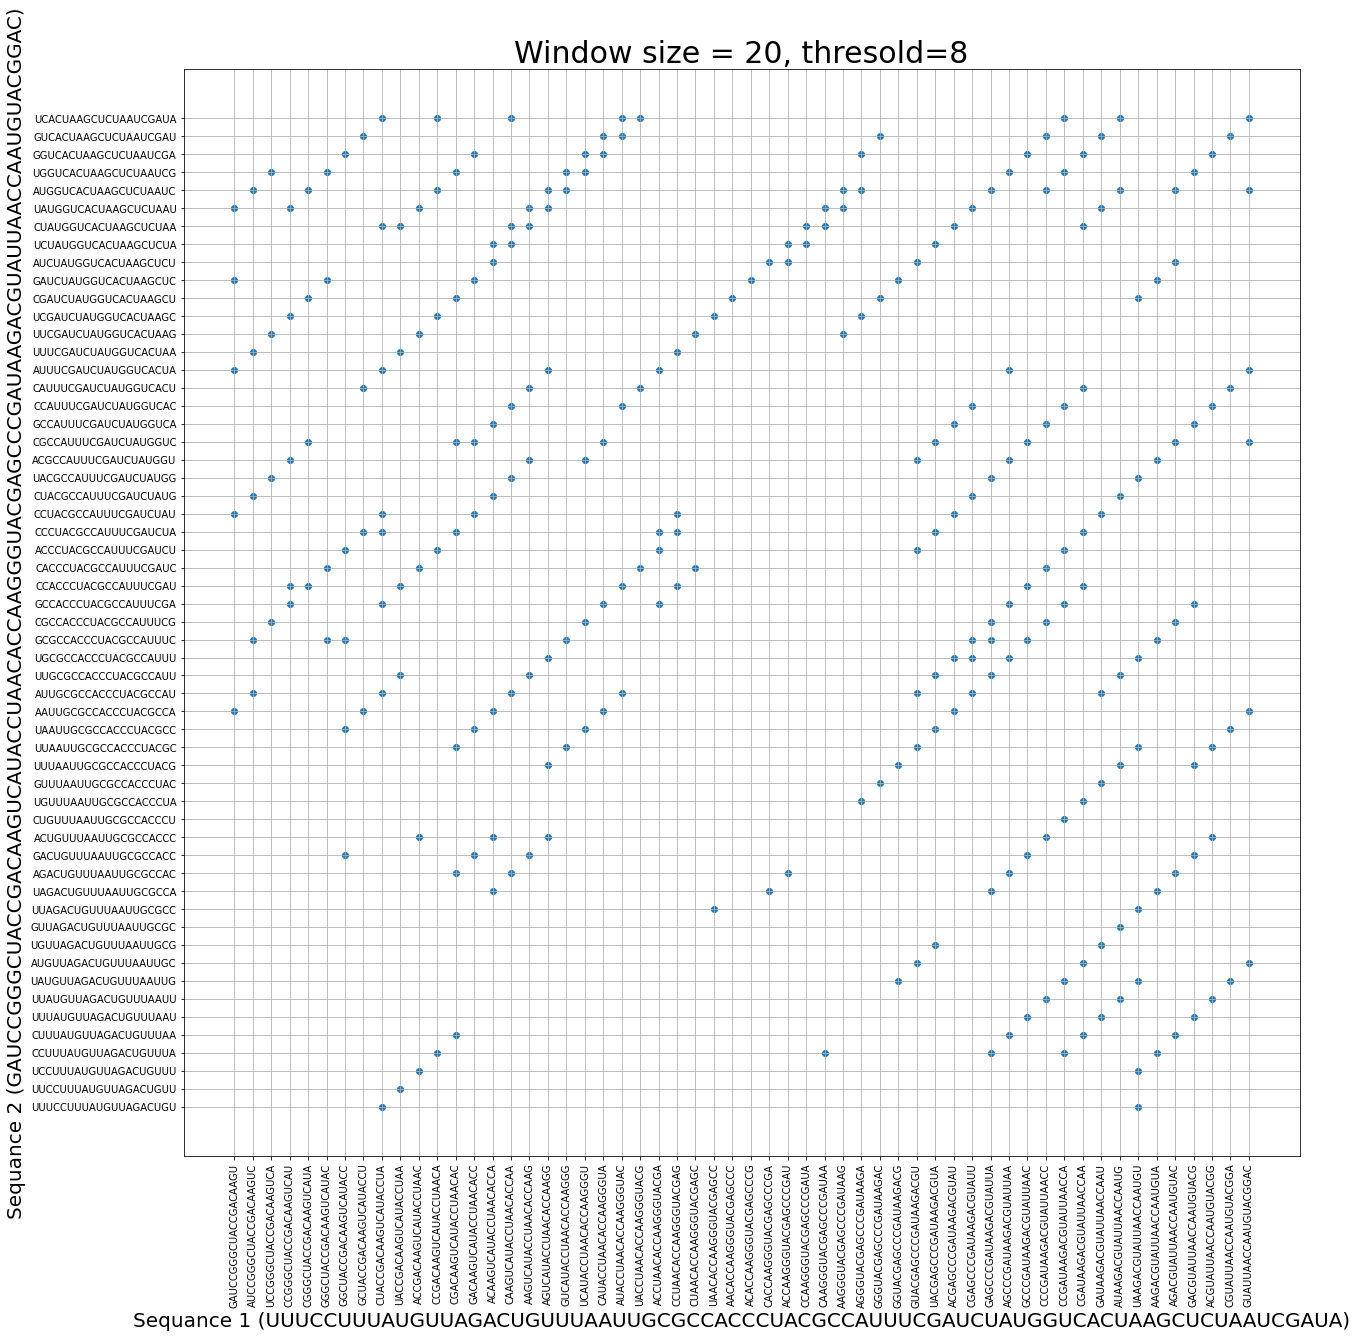

In [18]:
Sliding_window(seq1,seq2,thresold=8,window=20)